<a href="https://colab.research.google.com/github/masisparmo/capstone-project/blob/main/Analisa_Tren_Banjir_Jakarta_dengan_Python_dan_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Library berhasil diinstall dan diimport!
✅ Kunci API Replicate berhasil dikonfigurasi.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Data berhasil dimuat dan diproses.

Berikut 5 baris pertama dari data Anda:
                    dt                  kabupaten  jumlah_kejadian  meninggal  \
0  2025-05-23 09:15:00    Kota Adm. Jakarta Timur         1.000000          0   
1  2025-05-16 16:30:00    Kota Adm. Jakarta Timur         1.000000          0   
2  2025-05-15 08:10:00    Kota Adm. Jakarta Timur         1.000000          0   
3  2025-04-12 01:30:00    Kota Adm. Jakarta Timur         1.000000          0   
4  2025-03-18 10:21:00  Kota Adm. Jakarta Selatan         0.333333          0   

   hilang  luka_sakit  menderita  mengungsi  rumah_rusak_berat  \
0       0           0        351          0                  0   
1       0           0        450          0                  0   
2       0          

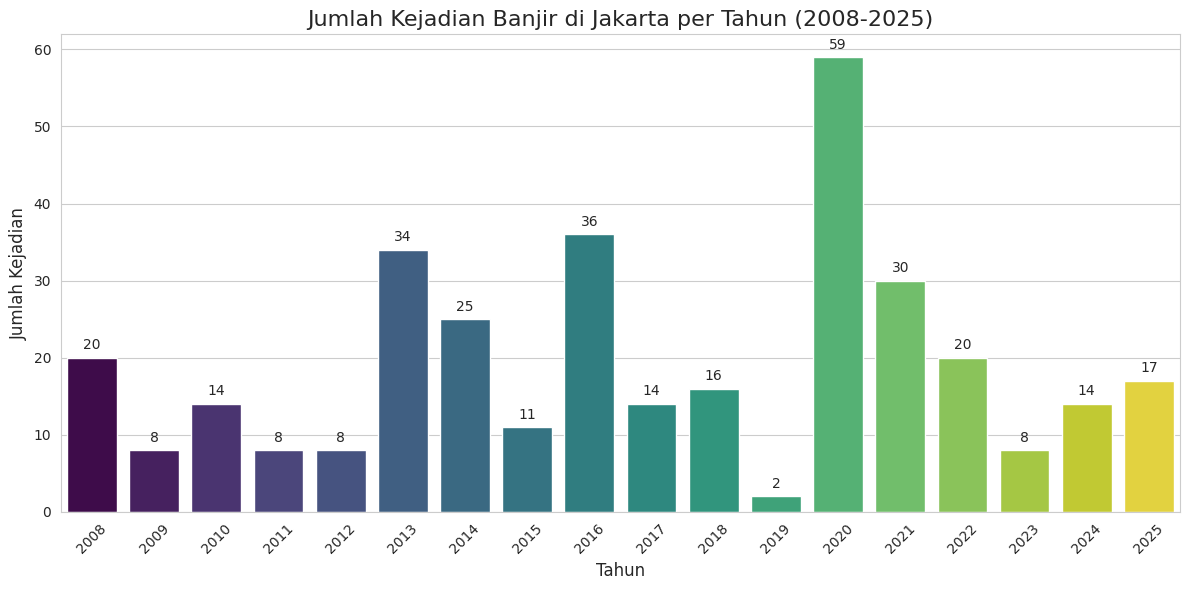


Membuat grafik bulan rawan banjir...


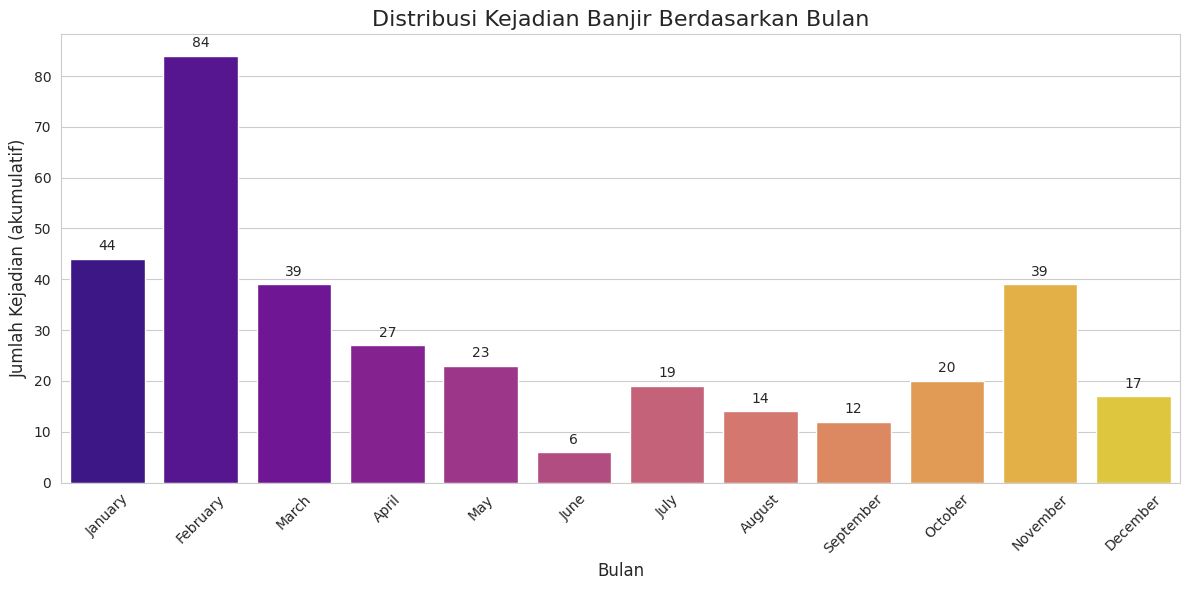


Membuat grafik wilayah paling sering terdampak...


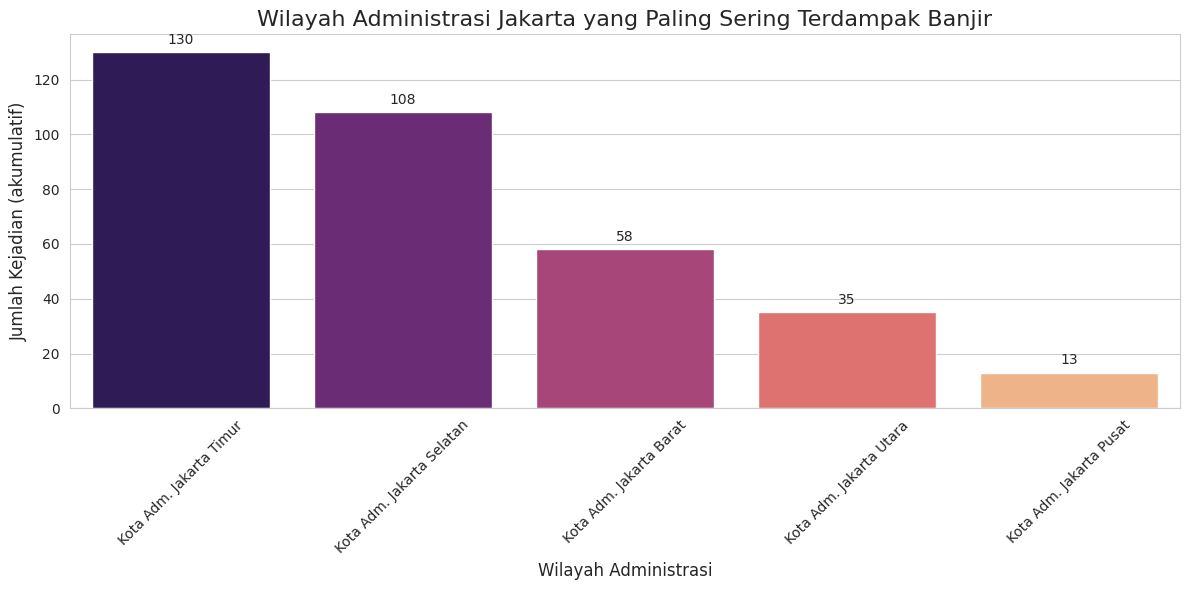


--- Ringkasan Data untuk AI ---

Summary of Jakarta Flood Data (2008-2025):
1.  Flood incidents per year: {2008: 20, 2009: 8, 2010: 14, 2011: 8, 2012: 8, 2013: 34, 2014: 25, 2015: 11, 2016: 36, 2017: 14, 2018: 16, 2019: 2, 2020: 59, 2021: 30, 2022: 20, 2023: 8, 2024: 14, 2025: 17}
2.  Flood incidents per month (cumulative): {'January': 44, 'February': 84, 'March': 39, 'April': 27, 'May': 23, 'June': 6, 'July': 19, 'August': 14, 'September': 12, 'October': 20, 'November': 39, 'December': 17}
3.  Flood incidents per administrative region (cumulative): {'Kota Adm. Jakarta Timur': 130, 'Kota Adm. Jakarta Selatan': 108, 'Kota Adm. Jakarta Barat': 58, 'Kota Adm. Jakarta Utara': 35, 'Kota Adm. Jakarta Pusat': 13}


Memanggil AI untuk analisa dan rekomendasi... Ini mungkin butuh beberapa saat.

--- HASIL ANALISA DAN REKOMENDASI DARI AI (IBM Granite Instruct via Replicate) ---
## Jakarta Flood Data Analysis and Recommendations

### 1. Key Trend Analysis

The data reveals distinct patterns in J

In [12]:
# ==============================================================================
# Coding Python ini dibuat dalam rangka menyelesaikan Capstone Project:
# HACKTIV8
# Student Development Initiative wave 3 (Juni 2025)
# Data Classification and Summarization Using IBM Granite (via Replicate)
# [ONLINE] Data Batch 5 (instruktur: Manfred Michael)

# Oleh : ISPARMO
# ==============================================================================
# LANGKAH 1: INSTALASI DAN IMPORT LIBRARY
# Library ini seperti 'toolkit' atau 'perkakas' yang membantu kita
# untuk mengolah data, membuat grafik, dan memanggil AI.
# ==============================================================================
!pip install pandas matplotlib seaborn replicate --upgrade --quiet

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import replicate
# Need to use os.environ to set environment variables for Replicate API Token
# You need to store your Replicate API Token in Colab secrets
# with the name 'REPLICATE_API_TOKEN'
from google.colab import userdata

print("✅ Library berhasil diinstall dan diimport!")

# ==============================================================================
# LANGKAH 2: KONFIGURASI API Replicate
# Mengambil kunci API yang sudah kita simpan di 'Secrets' tadi.
# ==============================================================================
try:
    # Ensure you have stored your Replicate API Token in Colab secrets
    # with the name 'REPLICATE_API_TOKEN'
    os.environ['REPLICATE_API_TOKEN'] = userdata.get('REPLICATE_API_TOKEN')
    print("✅ Kunci API Replicate berhasil dikonfigurasi.")
except Exception as e:
    print(f"🛑 Gagal mengambil kunci API Replicate. Pastikan Anda sudah menyimpannya di 'Secrets' dengan nama 'REPLICATE_API_TOKEN'. Error: {e}")

# ==============================================================================
# LANGKAH 3: MEMUAT DAN MEMAHAMI DATA BANJIR
# Kita 'baca' file CSV yang sudah diupload dan coba intip isinya.
# ==============================================================================
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Data_Banjir_Jakarta_2008-2025_BNBP_clean.csv'
try:
    # Membaca file CSV menjadi sebuah 'tabel data' yang disebut DataFrame
    df = pd.read_csv(file_path)

    # Mengubah kolom tanggal menjadi format tanggal yang dimengerti Python
    # errors='coerce' akan mengubah data yang formatnya salah menjadi kosong (NaT)
    # Menggunakan 'dt' sebagai nama kolom tanggal yang benar
    df['tanggal_kejadian'] = pd.to_datetime(df['dt'], errors='coerce')

    # Menghapus baris yang tanggalnya kosong setelah konversi
    df.dropna(subset=['tanggal_kejadian'], inplace=True)

    # Membuat kolom baru untuk tahun dan bulan agar mudah dianalisa
    df['tahun'] = df['tanggal_kejadian'].dt.year
    df['bulan'] = df['tanggal_kejadian'].dt.month_name()


    print("✅ Data berhasil dimuat dan diproses.")
    print("\nBerikut 5 baris pertama dari data Anda:")
    print(df.head())

    print("\nInformasi umum mengenai data:")
    df.info()

except FileNotFoundError:
    print(f"🛑 Error: File tidak ditemukan di path '{file_path}'. Pastikan Anda sudah mengupload file CSV ke Google Colab.")
except Exception as e:
    print(f"🛑 Terjadi error saat memuat data: {e}")


# ==============================================================================
# LANGKAH 4: ANALISA DAN VISUALISASI DATA
# Di sini kita akan membuat beberapa grafik untuk melihat tren banjir.
# ==============================================================================

# Atur style grafik agar terlihat lebih bagus
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# --- Analisa 1: Tren Jumlah Kejadian Banjir per Tahun ---
print("\nMembuat grafik tren banjir per tahun...")
kejadian_per_tahun = df['tahun'].value_counts().sort_index()

plt.figure() # Membuat kanvas baru
ax = sns.barplot(x=kejadian_per_tahun.index, y=kejadian_per_tahun.values, hue=kejadian_per_tahun.index, palette="viridis", legend=False)
ax.set_title('Jumlah Kejadian Banjir di Jakarta per Tahun (2008-2025)', fontsize=16)
ax.set_xlabel('Tahun', fontsize=12)
ax.set_ylabel('Jumlah Kejadian', fontsize=12)
plt.xticks(rotation=45)
# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.tight_layout()
plt.show()

# --- Analisa 2: Bulan-Bulan Rawan Banjir ---
print("\nMembuat grafik bulan rawan banjir...")
# Tentukan urutan bulan yang benar
bulan_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
kejadian_per_bulan = df['bulan'].value_counts().reindex(bulan_order)

plt.figure()
ax = sns.barplot(x=kejadian_per_bulan.index, y=kejadian_per_bulan.values, hue=kejadian_per_bulan.index, palette="plasma", legend=False)
ax.set_title('Distribusi Kejadian Banjir Berdasarkan Bulan', fontsize=16)
ax.set_xlabel('Bulan', fontsize=12)
ax.set_ylabel('Jumlah Kejadian (akumulatif)', fontsize=12)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.tight_layout()
plt.show()

# --- Analisa 3: Wilayah Paling Sering Terdampak ---
print("\nMembuat grafik wilayah paling sering terdampak...")
# Menggunakan 'kabupaten' sebagai nama kolom wilayah yang benar
kejadian_per_wilayah = df['kabupaten'].value_counts()

plt.figure()
ax = sns.barplot(x=kejadian_per_wilayah.index, y=kejadian_per_wilayah.values, hue=kejadian_per_wilayah.index, palette="magma", legend=False)
ax.set_title('Wilayah Administrasi Jakarta yang Paling Sering Terdampak Banjir', fontsize=16)
ax.set_xlabel('Wilayah Administrasi', fontsize=12)
ax.set_ylabel('Jumlah Kejadian (akumulatif)', fontsize=12)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.tight_layout()
plt.show()

# Menyiapkan ringkasan data untuk diberikan kepada AI
summary_for_ai = f"""
Summary of Jakarta Flood Data (2008-2025):
1.  Flood incidents per year: {kejadian_per_tahun.to_dict()}
2.  Flood incidents per month (cumulative): {kejadian_per_bulan.to_dict()}
3.  Flood incidents per administrative region (cumulative): {kejadian_per_wilayah.to_dict()}
"""
print("\n--- Ringkasan Data untuk AI ---")
print(summary_for_ai)


# ==============================================================================
# LANGKAH 5: MENGGUNAKAN AI (LLM) UNTUK INSIGHT DAN REKOMENDASI
# Sekarang kita 'bertanya' kepada AI menggunakan data yang sudah kita olah.
# ==============================================================================
print("\nMemanggil AI untuk analisa dan rekomendasi... Ini mungkin butuh beberapa saat.")

# Membuat prompt (perintah) untuk AI dalam Bahasa Inggris
prompt_untuk_ai = f"""
You are an expert urban planning and disaster mitigation consultant for the Jakarta Provincial Government.
Based on the following summary of historical flood data, provide a concise analysis and actionable recommendations.

**Data Summary:**
{summary_for_ai}

**Your Task:**
1.  **Key Trend Analysis:** Briefly summarize the most critical trends observed from the data. What are the peak years and months for flooding? Which areas are most vulnerable?
2.  **Potential Root Causes:** Based on these trends, hypothesize the likely underlying causes (e.g., monsoon season, infrastructure issues, land subsidence, urban development).
3.  **Actionable Recommendations:** Provide concrete, data-driven recommendations categorized into three stages:
    * **Short-Term (next 6 months):** Immediate actions to prepare for the next peak season.
    * **Medium-Term (1-3 years):** Infrastructure and policy improvements.
    * **Long-Term (3+ years):** Sustainable strategic initiatives for the city's future.

Please structure your response clearly with headers for each section.
"""

# Memanggil model AI IBM Granite Instruct via Replicate
try:
    # Choose the IBM Granite Instruct model on Replicate
    # The model name on Replicate is typically in the format "developer/model-name:version"
    model_name = "ibm-granite/granite-3.3-8b-instruct"

    # Set up inputs for the Replicate model
    input = {
        "prompt": prompt_untuk_ai,
        "max_new_tokens": 10000, # Adjust as needed
        "temperature": 0.7, # Adjust as needed
        "top_p": 0.9 # Adjust as needed
    }

    # Generate content using the Replicate API
    output = replicate.run(
        model_name,
        input=input
    )

    # The output from Replicate is an iterable, join it to get the full text
    response_text = "".join(output)

    print("\n--- HASIL ANALISA DAN REKOMENDASI DARI AI (IBM Granite Instruct via Replicate) ---")
    print(response_text)
    print("\n✅ AI berhasil memberikan respon.")

except Exception as e:
    print(f"🛑 Gagal memanggil AI IBM Granite Instruct via Replicate. Error: {e}")